# Lab 04

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

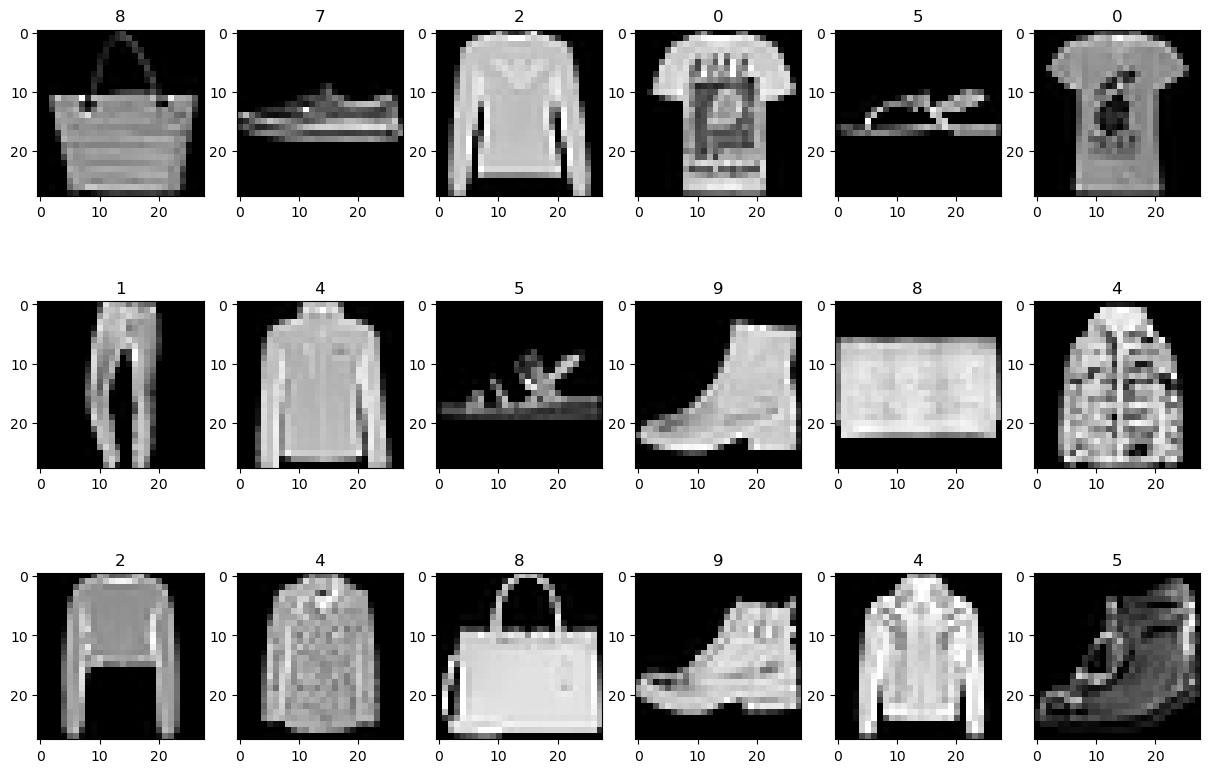

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [4]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [8]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3213002 (12.26 MB)
Trainable params: 3213002 (12.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 38s 40ms/step - loss: 0.3851 - accuracy: 0.8644 - val_loss: 0.3212 - val_accuracy: 0.8826
Epoch 2/50
938/938 [==============================] - 39s 42ms/step - loss: 0.2659 - accuracy: 0.9053 - val_loss: 0.2996 - val_accuracy: 0.8922
Epoch 3/50
938/938 [==============================] - 41s 44ms/step - loss: 0.2255 - accuracy: 0.9185 - val_loss: 0.3013 - val_accuracy: 0.8942
Epoch 4/50
938/938 [==============================] - 42s 45ms/step - loss: 0.1941 - accuracy: 0.9290 - val_loss: 0.3075 - val_accuracy: 0.8978
Epoch 5/50
938/938 [==============================] - 42s 45ms/step - loss: 0.1719 - accuracy: 0.9378 - val_loss: 0.3183 - val_accuracy: 0.8973
Epoch 6/50
938/938 [==============================] - 42s 45ms/step - loss: 0.1533 - accuracy: 0.9447 - val_loss: 0.3183 - val_accuracy: 0.9000
Epoch 7/50
938/938 [==============================] - 39s 42ms/step - loss: 0.1363 - accuracy: 0.9493 - val_loss: 0.3410 - val_accuracy:

Train Acc      0.9931166768074036
Validation Acc 0.8873000144958496


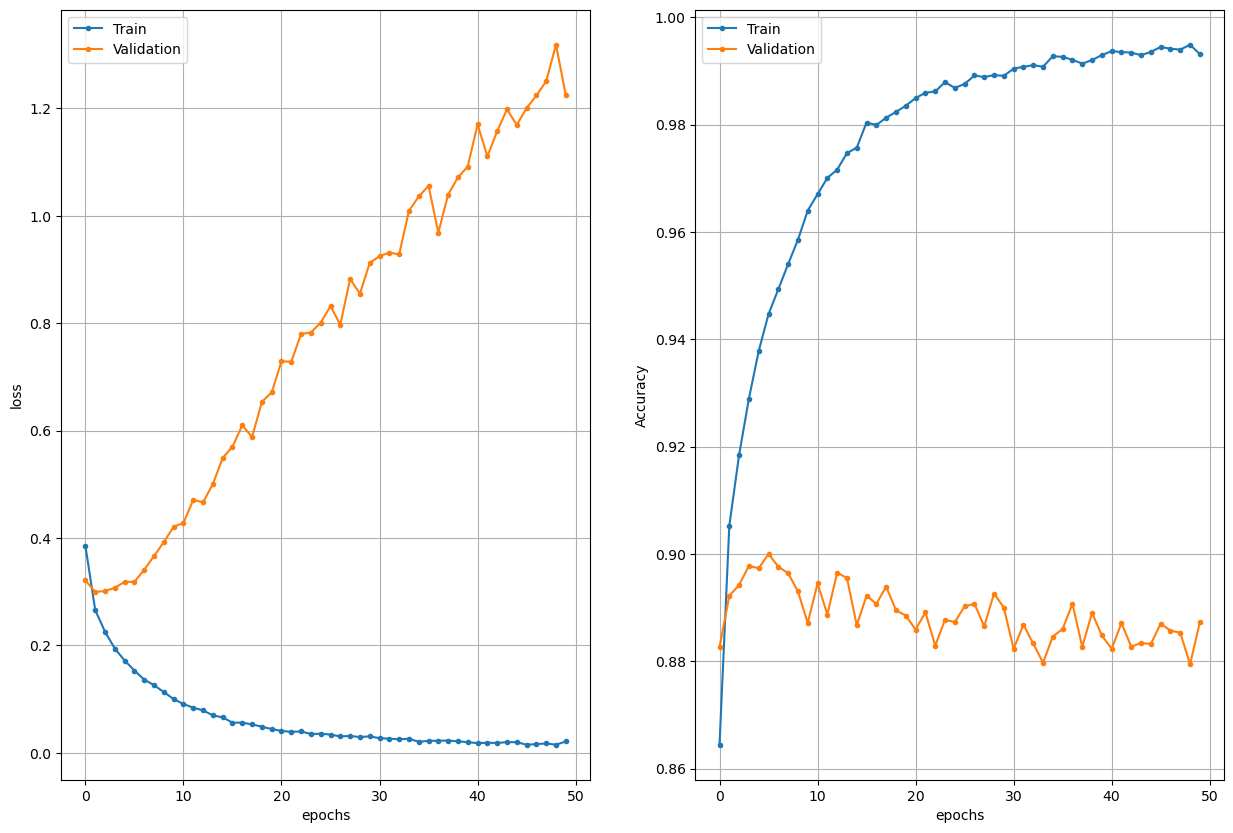

In [10]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

### Dropping neurons

In [11]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Dropout(0.5)(net)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3211392   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3213002 (12.26 MB)
Trainable params: 3213002 

In [12]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 56s 59ms/step - loss: 0.4244 - accuracy: 0.8522 - val_loss: 0.3394 - val_accuracy: 0.8789
Epoch 2/50
938/938 [==============================] - 56s 60ms/step - loss: 0.3075 - accuracy: 0.8896 - val_loss: 0.3041 - val_accuracy: 0.8910
Epoch 3/50
938/938 [==============================] - 57s 61ms/step - loss: 0.2782 - accuracy: 0.8973 - val_loss: 0.3095 - val_accuracy: 0.8904
Epoch 4/50
938/938 [==============================] - 57s 61ms/step - loss: 0.2581 - accuracy: 0.9052 - val_loss: 0.2924 - val_accuracy: 0.8961
Epoch 5/50
938/938 [==============================] - 57s 60ms/step - loss: 0.2471 - accuracy: 0.9086 - val_loss: 0.3088 - val_accuracy: 0.8924
Epoch 6/50
938/938 [==============================] - 55s 58ms/step - loss: 0.2372 - accuracy: 0.9123 - val_loss: 0.2856 - val_accuracy: 0.8996
Epoch 7/50
938/938 [==============================] - 59s 63ms/step - loss: 0.2257 - accuracy: 0.9173 - val_loss: 0.2920 - val_accuracy:

Train Acc      0.9503333568572998
Validation Acc 0.9009000062942505


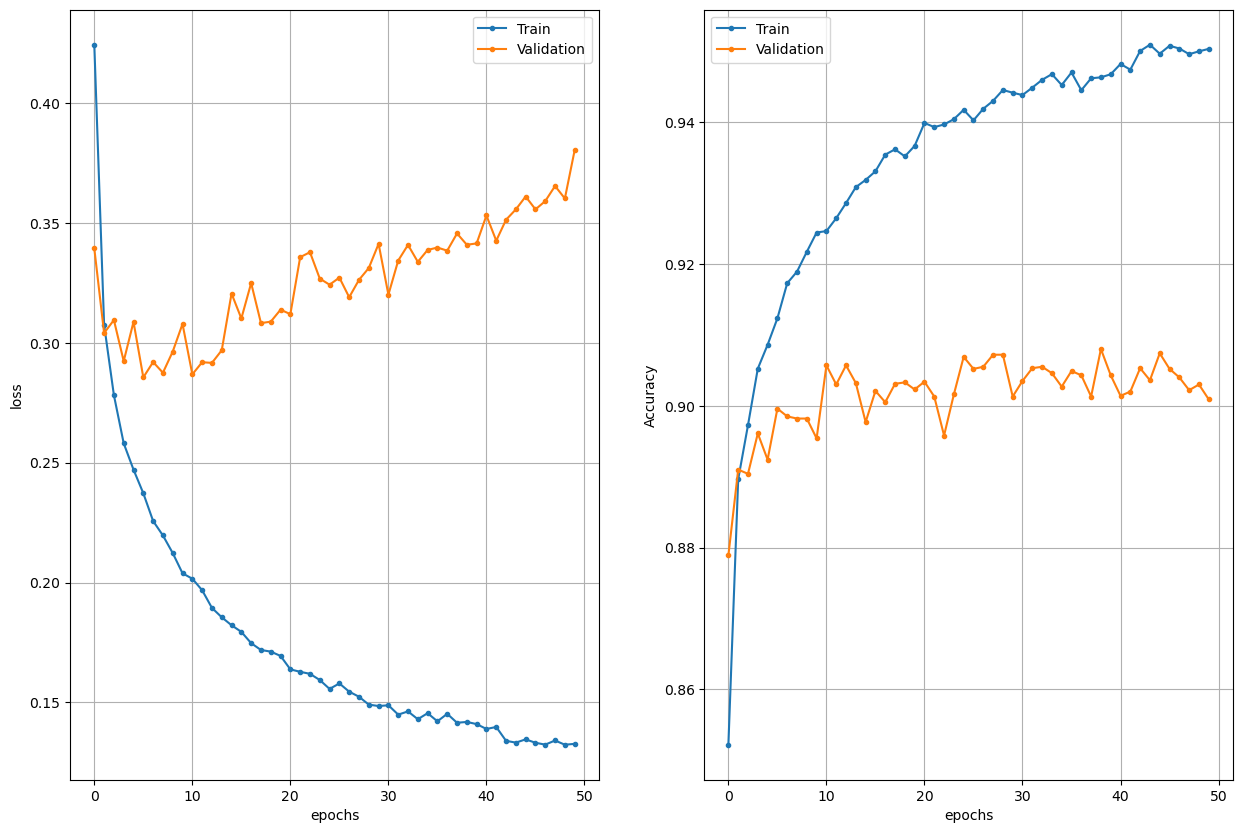

In [13]:
plot_history(history)

### Batch normalization

In [14]:
from tensorflow.keras.layers import BatchNormalization
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = BatchNormalization()(net)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3211392   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                           

In [15]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 45s 47ms/step - loss: 0.6699 - accuracy: 0.8506 - val_loss: 0.3767 - val_accuracy: 0.8666
Epoch 2/50
938/938 [==============================] - 49s 52ms/step - loss: 0.2725 - accuracy: 0.9035 - val_loss: 0.3383 - val_accuracy: 0.8856
Epoch 3/50
938/938 [==============================] - 42s 44ms/step - loss: 0.2257 - accuracy: 0.9186 - val_loss: 0.3665 - val_accuracy: 0.8815
Epoch 4/50
938/938 [==============================] - 42s 45ms/step - loss: 0.1966 - accuracy: 0.9290 - val_loss: 0.3650 - val_accuracy: 0.8825
Epoch 5/50
938/938 [==============================] - 44s 47ms/step - loss: 0.1778 - accuracy: 0.9351 - val_loss: 0.3866 - val_accuracy: 0.8827
Epoch 6/50
938/938 [==============================] - 43s 46ms/step - loss: 0.1611 - accuracy: 0.9416 - val_loss: 0.4031 - val_accuracy: 0.8829
Epoch 7/50
938/938 [==============================] - 46s 49ms/step - loss: 0.1465 - accuracy: 0.9458 - val_loss: 0.4439 - val_accuracy:

Train Acc      0.9931833148002625
Validation Acc 0.8729000091552734


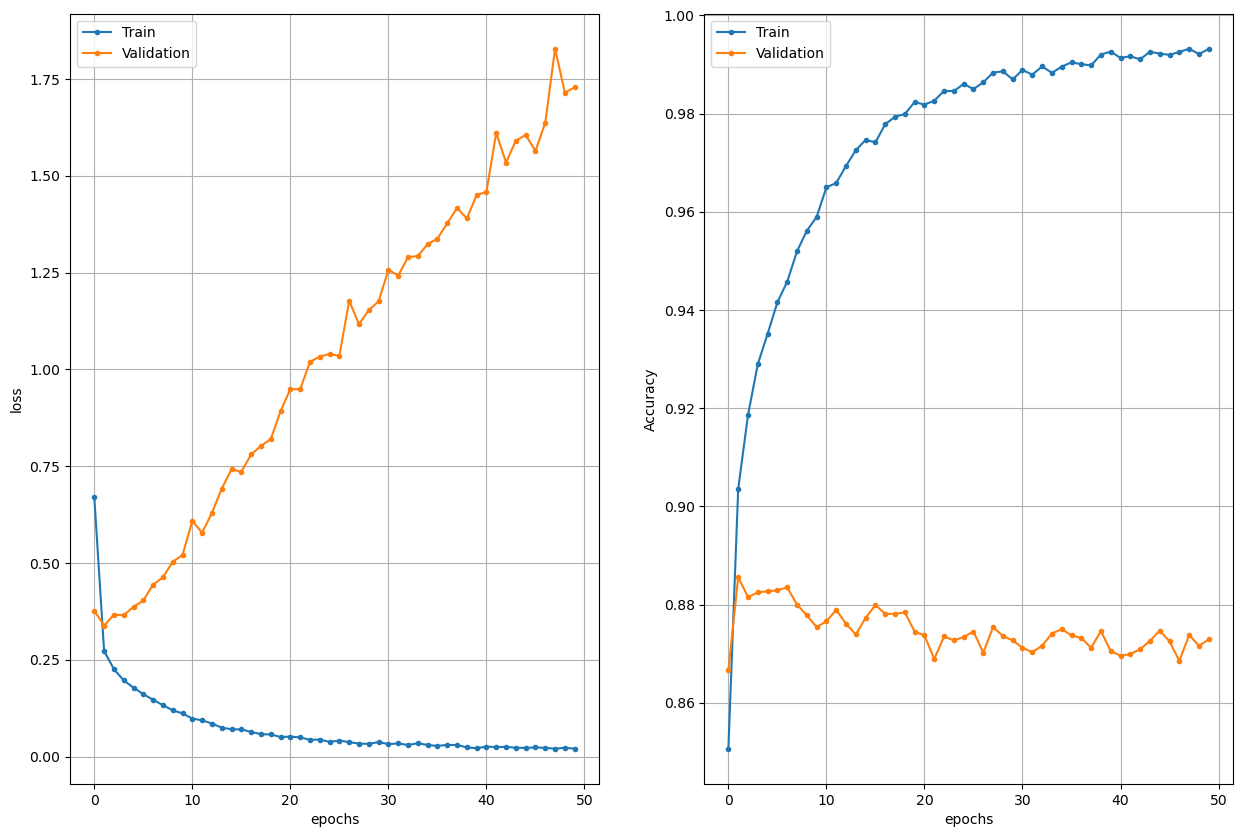

In [16]:
plot_history(history)

### early stopping

In [17]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5)

In [18]:
epochs = 50
batch_size = 64
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Dropout(0.5)(net)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=early_stopping)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 dropout_2 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               3211392   
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3213002 (12.26 MB)
Trainable params: 3213002 

Train Acc      0.9230499863624573
Validation Acc 0.8974000215530396


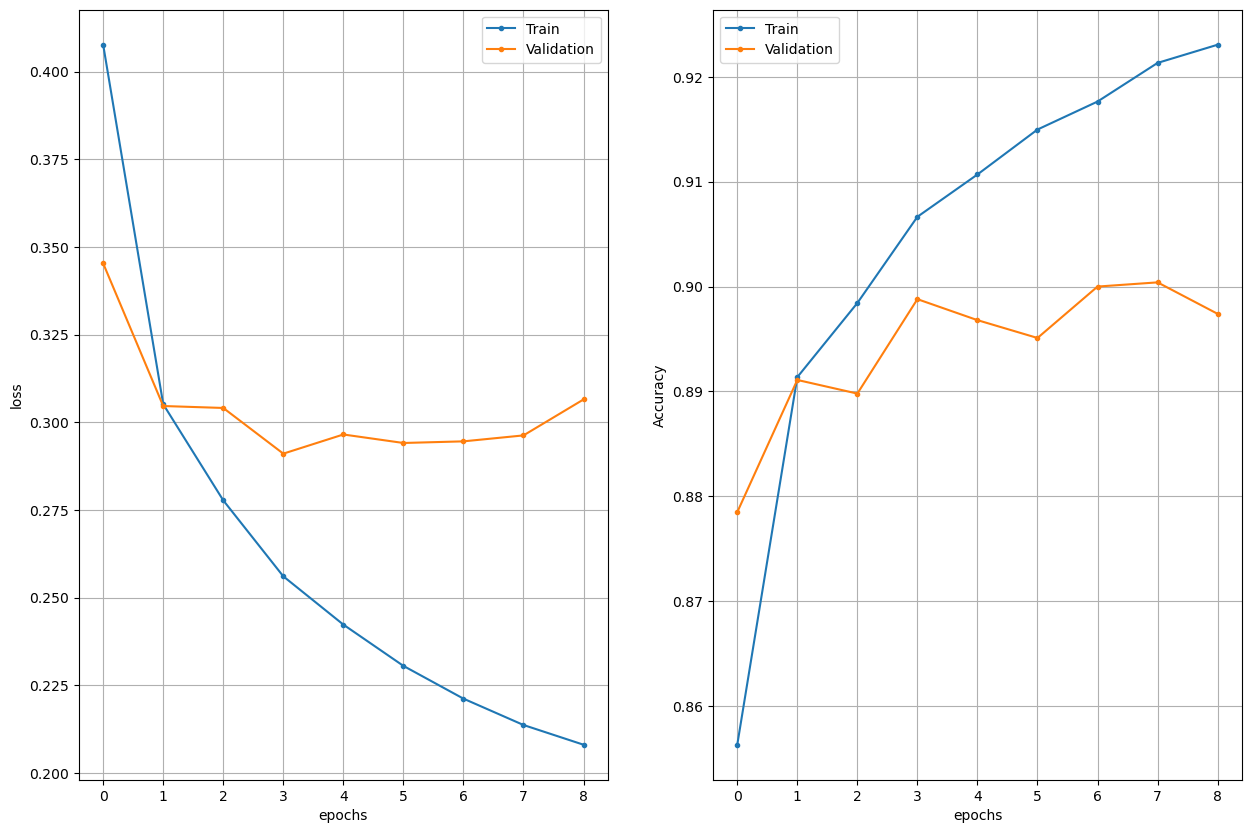

In [19]:
plot_history(history)

### Adding maxpooling

In [20]:
epochs = 50
batch_size = 64
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D((2, 2))(net)
net = Dropout(0.5)(net)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=EarlyStopping(patience=10))

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               802944    
                                                           

Train Acc      0.9204833507537842
Validation Acc 0.909600019454956


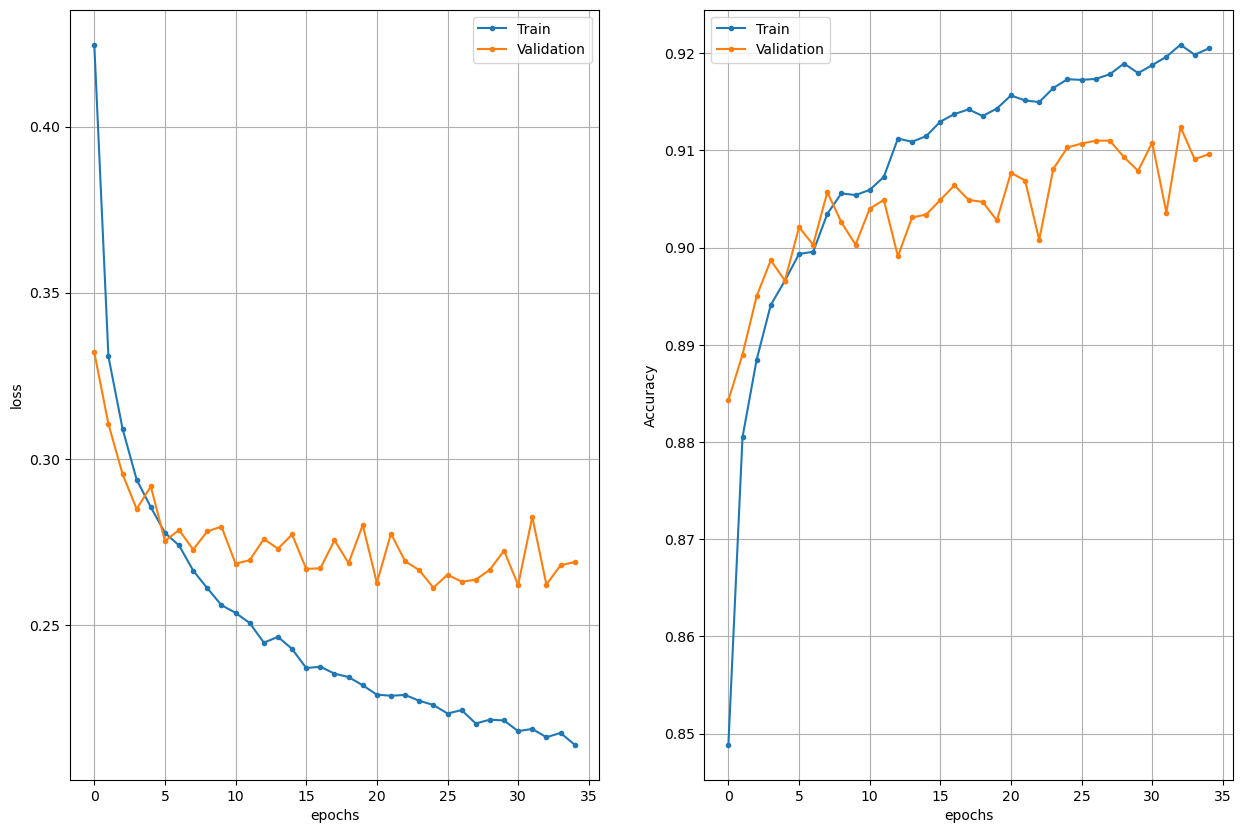

In [21]:
plot_history(history)

### Augmentation

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_images = train_images/255
test_images = test_images/255
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_images)

augmented_data_generator = datagen.flow(train_images, train_labels, batch_size=32)
model.fit(augmented_data_generator, epochs=10, validation_data=(test_images, test_labels), callbacks=EarlyStopping(patience=10))

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 1.2436 - accuracy: 0.5461 - val_loss: 0.8863 - val_accuracy: 0.7014
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 1.0327 - accuracy: 0.6244 - val_loss: 0.9254 - val_accuracy: 0.7069
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.9824 - accuracy: 0.6420 - val_loss: 1.0412 - val_accuracy: 0.6907
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.9681 - accuracy: 0.6475 - val_loss: 0.9809 - val_accuracy: 0.7020
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.9443 - accuracy: 0.6580 - val_loss: 1.0642 - val_accuracy: 0.6943
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.9336 - accuracy: 0.6597 - val_loss: 0.9473 - val_accuracy: 0.7114
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.9297 - accuracy: 0.6623 - val_loss: 0.9229 -

### Weights 

In [23]:
from keras.regularizers import l1
epochs = 50
batch_size = 64
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same', kernel_regularizer=l1(0.01))(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.5)(net)
net = Flatten()(net)
net = Dense(128, kernel_regularizer=l1(0.01))(net)
outputs = Dense(10, activation="softmax", kernel_regularizer=l1(0.01))(net)

model = Model(inputs, outputs)
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=EarlyStopping(patience=10))

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_6 (Flatten)         (None, 6272)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               802944    
                                                           

### Reducing the number of parameters (the size of the network)

In [24]:
epochs = 50
batch_size = 64
inputs = Input(shape=(28, 28, 1))
net = Conv2D(28, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Dropout(0.3)(net)
net = Flatten()(net)
net = Dense(64)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks= EarlyStopping(patience=10))

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 dropout_5 (Dropout)         (None, 28, 28, 28)        0         
                                                                 
 flatten_7 (Flatten)         (None, 21952)             0         
                                                                 
 dense_14 (Dense)            (None, 64)                1404992   
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 1405922 (5.36 MB)
Trainable params: 1405922 (

Train Acc      0.9448166489601135
Validation Acc 0.9046000242233276


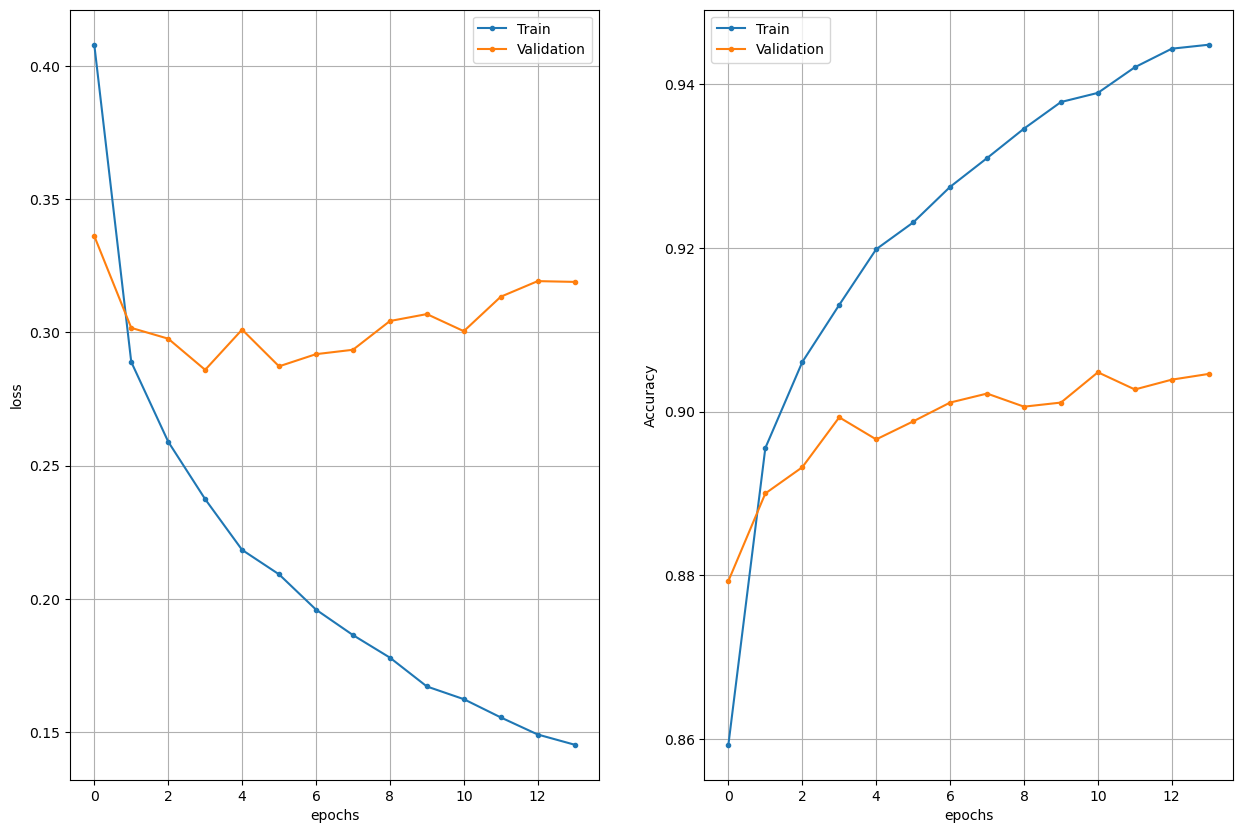

In [25]:
plot_history(history)

### adding more maxpooling

In [5]:
epochs = 50
batch_size = 64
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.3)(net)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                             

Train Acc      0.9388999938964844
Validation Acc 0.9122999906539917


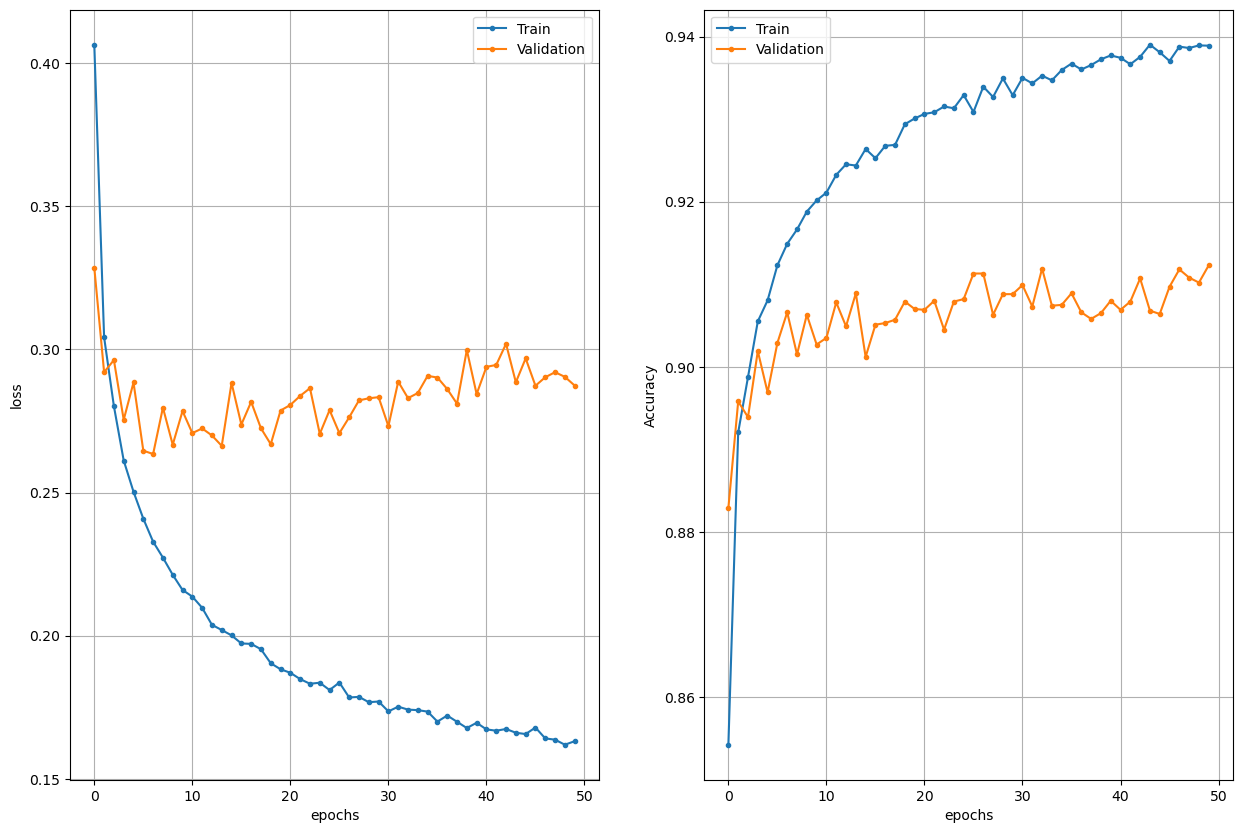

In [7]:
   plot_history(history)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_8 (Flatten)         (None, 6272)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               802944    
                                                           

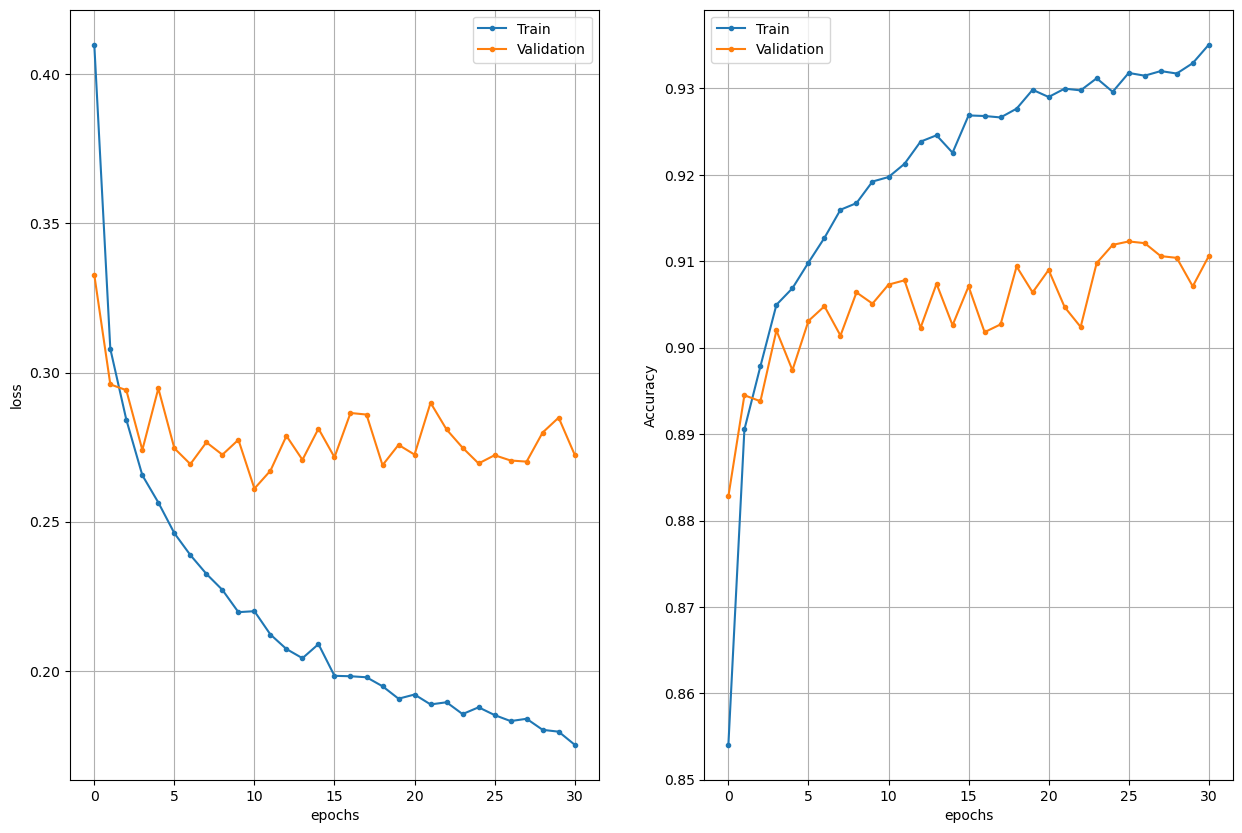

In [26]:
epochs = 50
batch_size = 64
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Dropout(0.3)(net)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test),
                   callbacks= EarlyStopping(patience=20))
plot_history(history)

### Questions

* What have you done in order to improve the performance?
* Have you tried configurations that did not work out?